In [38]:
#Dependancies

import pandas as pd
import matplotlib.pyplot as plt


In [39]:
df_a = pd.read_csv("./Resources/tech_layoffs.csv")

df_a

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2913,TutorMundi,Sao Paulo,Brazil,South America,4,2020-04-24 00:00:00 UTC,100.000000,4,0,Education,Series A,$2,2020,-23.54750,-46.63611
1414,3039,Spyce,Boston,USA,North America,4,2020-04-08 00:00:00 UTC,12.000000,33,29,Food,Series A,$26,2020,42.35843,-71.05977
1415,3261,Flytedesk,Boulder,USA,North America,4,2020-03-18 00:00:00 UTC,20.000000,20,16,Marketing,Seed,$4,2020,40.01499,-105.27055
1416,447,FrontRow,Bengaluru,India,Asia,4,2023-07-10 00:00:00 UTC,100.000000,4,0,Education,Series A,$17,2023,12.97194,77.59369


In [40]:
df_a.columns

Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'lng'],
      dtype='object')

In [41]:
df_a.dtypes

#                                int64
Company                         object
Location_HQ                     object
Country                         object
Continent                       object
Laid_Off                         int64
Date_layoffs                    object
Percentage                     float64
Company_Size_before_Layoffs      int64
Company_Size_after_layoffs       int64
Industry                        object
Stage                           object
Money_Raised_in_$_mil           object
Year                             int64
lat                            float64
lng                            float64
dtype: object

In [42]:
grouped_df_a = df_a.groupby(['Industry'])
grouped_df_a.count().head(10)

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Stage,Money_Raised_in_$_mil,Year,lat,lng
Industry,,,,,,,,,,,,,,,
AI,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Aerospace,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Construction,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Consumer,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
Crypto,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Data,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
Education,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
Energy,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Finance,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200


In [49]:
industry_totals = grouped_df_a['Laid_Off'].sum()
top_5 = industry_totals.sort_values(ascending=False).head(5)
other = industry_totals.sort_values(ascending=False).reset_index().iloc[5:]
top_5_df = pd.DataFrame(top_5)
display(other)
display(top_5_df)

,Industry,Laid_Off
5,Finance,27248
6,Real Estate,15102
7,Sales,13151
8,Healthcare,13069
9,Crypto,10374
10,Travel,10371
11,Fitness,8328
12,Education,8310
13,Hardware,7480
14,Marketing,7449


,Laid_Off
Industry,
Consumer,52486
Retail,52065
Other,39002
Transportation,35649
Food,31024


<Axes: xlabel='Industry'>

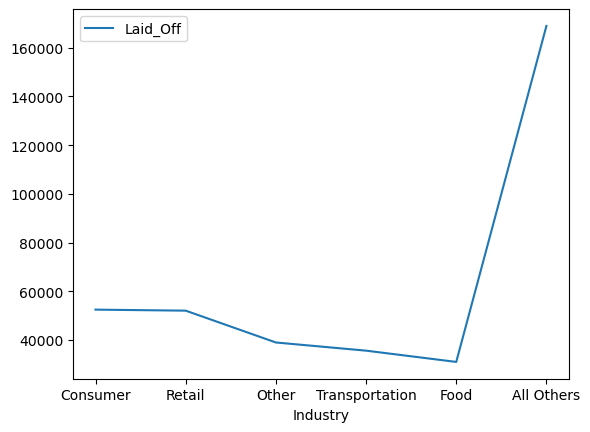

In [50]:
top_5_df = top_5_df.reset_index()
other_total = other["Laid_Off"].sum()
new_row = {'Industry':'All Others', 'Laid_Off':[other_total]}
new_row_df = pd.DataFrame(new_row)

industry_df = pd.concat([top_5_df, new_row_df], ignore_index=True)
industry_df = industry_df.set_index('Industry', drop=True)
industry_df.plot()

<Figure size 640x480 with 0 Axes>

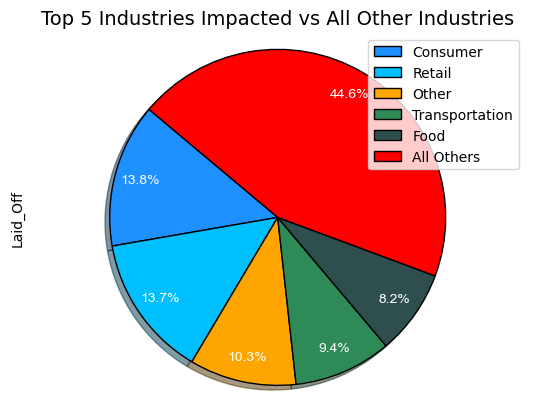

In [64]:
# Plot the pie chart
plt.figure(facecolor='rosybrown')

# Define colors for the slices
colors = ['dodgerblue', 'deepskyblue', 'orange', 'seagreen', 'darkslategrey', 'red']

# Plot the pie chart
pie = industry_df.plot.pie(y='Laid_Off',
                           labels=industry_df.index,
                           autopct='%1.1f%%',  # Display percentages
                           startangle=140,
                           shadow=True,
                           colors=colors,
                           pctdistance=0.85,
                           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
                           textprops={'rotation': 0, 'fontname': 'Arial', 'color': 'White'}
                          )

plt.title('Top 5 Industries Impacted vs All Other Industries', fontsize=14)
plt.axis('equal')

# # Set the color of the legend marker to black
# plt.legend([f'Total Layoffs: {company_layoffs.sum()}'],
#            loc='lower right',
#            handlelength=0,
#            fontsize='large',
#            facecolor='black',
#            edgecolor='white',
#            labelcolor='white',
#            shadow=True
#            )

plt.show()

Text(0, 0.5, 'Number of laid off employees')

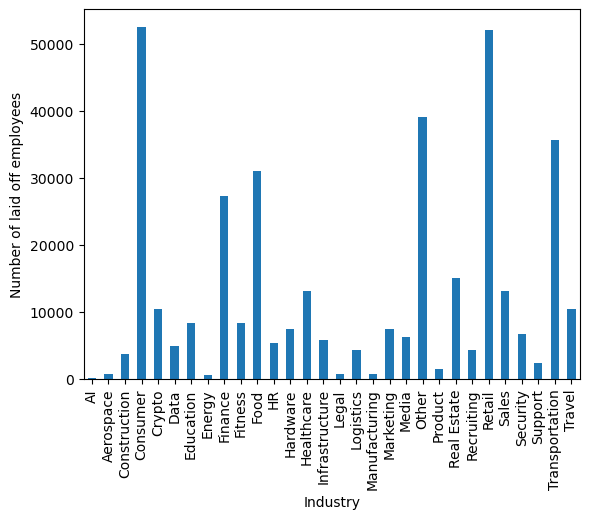

In [79]:
colors_dict = {}

industry_totals.plot.bar()
plt.ylabel("Number of laid off employees")